In [3]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def read_config(path):
    """Read rectangles (node, x1, x2, y1, y2) from a .config file."""
    rects = []
    with open(path, "r") as f:
        for line in f:
            if not line.strip() or line.startswith("#"):
                continue
            parts = line.split()
            if len(parts) >= 5:
                node, x1, x2, y1, y2 = parts[:5]
                rects.append((int(node), float(x1), float(x2), float(y1), float(y2)))
    return rects

def plot_rectangles(rects, title=None, ax=None, alpha=0.3):
    """Plot a list of rectangles (with low opacity and distinct colors)."""
    if not rects:
        print("No rectangles to plot.")
        return
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
    
    cmap = plt.get_cmap("tab20")
    
    for i, (node, x1, x2, y1, y2) in enumerate(rects):
        color = cmap(i % cmap.N)
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 facecolor=color, edgecolor='black', alpha=alpha)
        ax.add_patch(rect)
        ax.text((x1 + x2)/2, (y1 + y2)/2, str(node),
                ha='center', va='center', fontsize=8, color='black')
    
    x_min, x_max = min(r[1] for r in rects), max(r[2] for r in rects)
    y_min, y_max = min(r[3] for r in rects), max(r[4] for r in rects)
    pad_x = (x_max - x_min) * 0.05 or 1
    pad_y = (y_max - y_min) * 0.05 or 1
    
    ax.set_xlim(x_min - pad_x, x_max + pad_x)
    ax.set_ylim(y_min - pad_y, y_max + pad_y)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_title(title or "Rectangle Configuration")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

def plot_all_configs(input_dir="solved_configurations", limit=None):
    """Plot all .config files in a directory (useful in notebooks)."""
    files = sorted(glob.glob(os.path.join(input_dir, "*.config")))
    if not files:
        print(f"No .config files found in {input_dir}")
        return
    
    if limit:
        files = files[:limit]
    
    for path in files:
        title = os.path.basename(path)
        rects = read_config(path)
        fig, ax = plt.subplots(figsize=(6, 6))
        plot_rectangles(rects, title=title, ax=ax)
        plt.show()


In [4]:
def plot_rectangles(rects, title=None, ax=None, alpha=0.3, a=None):
    """
    Plot a list of rectangles (with low opacity and distinct colors).
    If `a` is provided, rectangles with indices 0..a-1 use blue shades,
    the rest use red shades.
    """
    if not rects:
        print("No rectangles to plot.")
        return

    # If no axes provided, create figure and axes
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    total = len(rects)
    # determine how many rectangles are "first group" (blue)
    if a is None:
        n_first = 0
    else:
        n_first = max(0, min(a, total))
    n_second = total - n_first

    blues = plt.get_cmap("Blues")
    reds = plt.get_cmap("Reds")

    for i, (node, x1, x2, y1, y2) in enumerate(rects):
        # pick color depending on index and groupsize, with different shades
        if i < n_first:
            # shade position in [0.0, 1.0]; avoid dividing by zero
            denom = max(1, n_first - 1)
            shade_pos = i / denom
            # push shade away from extremes so colors are visually distinct
            color = blues(0.25 + 0.7 * shade_pos)
        else:
            if n_second > 0:
                denom = max(1, n_second - 1)
                shade_pos = (i - n_first) / denom
            else:
                shade_pos = 0.0
            color = reds(0.25 + 0.7 * shade_pos)

        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 facecolor=color, edgecolor='black', alpha=alpha)
        ax.add_patch(rect)
        ax.text((x1 + x2)/2, (y1 + y2)/2, str(node),
                ha='center', va='center', fontsize=8, color='black')

    x_min, x_max = min(r[1] for r in rects), max(r[2] for r in rects)
    y_min, y_max = min(r[3] for r in rects), max(r[4] for r in rects)
    pad_x = (x_max - x_min) * 0.05 or 1
    pad_y = (y_max - y_min) * 0.05 or 1
    ax.set_xlim(x_min - pad_x, x_max + pad_x)
    ax.set_ylim(y_min - pad_y, y_max + pad_y)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_title(title or "Rectangle Configuration")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # REMOVE THIS RETURN STATEMENT - this is what's causing double plotting
    # return fig

def plot_all_configs(input_dir="solved_configurations", pattern="*.config", limit=None):
    """
    Plot all files matching pattern in a directory (useful in notebooks).
    Filename parsing looks for 'cycle_<a>_<b>...' and passes `a` into plotting.
    Default pattern is '*.config', change to '*.adjlist' if needed.
    """
    files = sorted(glob.glob(os.path.join(input_dir, pattern)))
    if not files:
        print(f"No files found in {input_dir} matching {pattern}")
        return
    if limit:
        files = files[:limit]

    for path in files:
        title = os.path.basename(path)
        rects = read_config(path)

        # parse a and b from filename if possible: expect 'cycle_<a>_<b>...'
        base = os.path.basename(path)
        m = re.search(r'cycle_(\d+)_(\d+)', base)
        if m:
            a_val = int(m.group(1))
            b_val = int(m.group(2))
        else:
            a_val = None
            b_val = None

        fig, ax = plt.subplots(figsize=(6, 6))
        plot_rectangles(rects, title=title, ax=ax, alpha=0.3, a=a_val)
        # optionally annotate parsed a/b in the plot title
        if a_val is not None:
            ax.set_title(f"{title}  (a={a_val}, b={b_val})")
        plt.show()

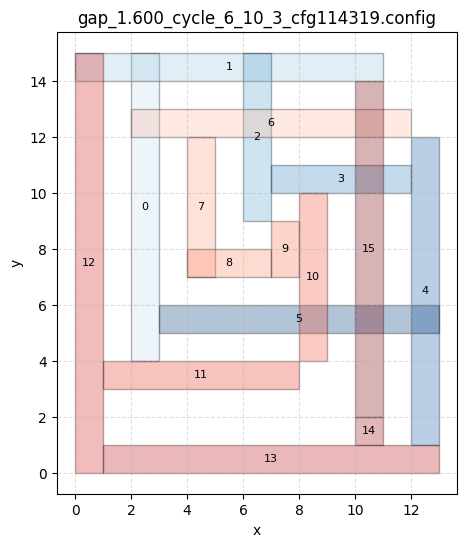

In [7]:
# Plot a single file
rects = read_config("solved_configurations/gap_1.600_cycle_6_10_3_cfg114319.config")
plot_rectangles(rects, title="gap_1.600_cycle_6_10_3_cfg114319.config", alpha=0.3, a=6)

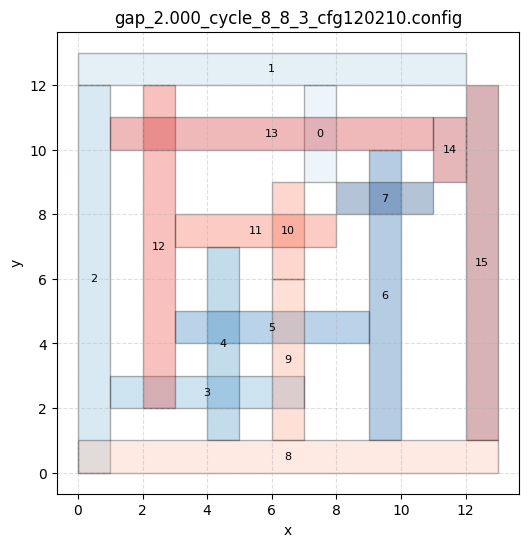

In [9]:
# Plot a single file
rects = read_config("solved_configurations/gap_2.000_cycle_8_8_3_cfg120210.config")
plot_rectangles(rects, title="gap_2.000_cycle_8_8_3_cfg120210.config", alpha=0.3, a=8)

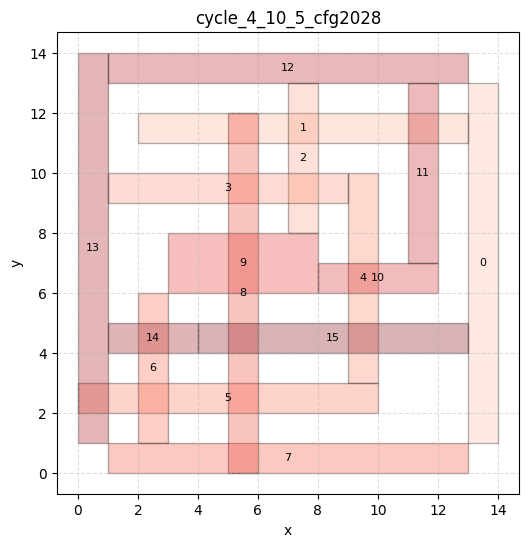

In [10]:
# Plot a single file
rects = read_config("solved_configurations/gap_2.000_cycle_8_8_3_cfg249970.config")
plot_rectangles(rects, title="cycle_4_10_5_cfg2028")

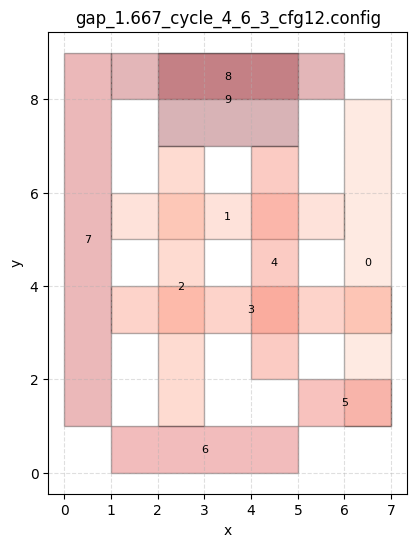

In [11]:
# Plot a single file
rects = read_config("solved_configurations/gap_1.667_cycle_4_6_3_cfg12.config")
plot_rectangles(rects, title="gap_1.667_cycle_4_6_3_cfg12.config")

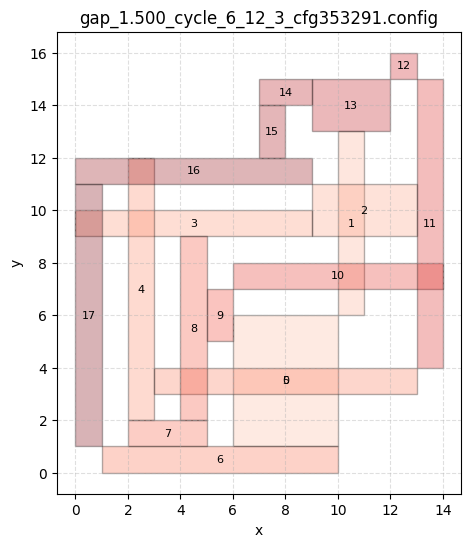

In [12]:
# Plot a single file
rects = read_config("solved_configurations/gap_1.500_cycle_6_12_3_cfg353291.config")
plot_rectangles(rects, title="gap_1.500_cycle_6_12_3_cfg353291.config")

In [ ]:
# Plot a single file
rects = read_config("solved_configurations/")
plot_rectangles(rects, title="cycle_6_9_7")

In [ ]:
# Plot a single file
rects = read_config("solved_configurations/")
plot_rectangles(rects, title="cycle_6_9_7")

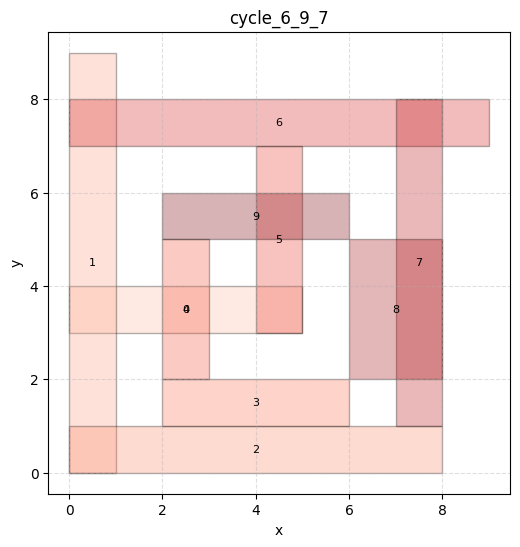

In [5]:
# Plot a single file
rects = read_config("solved_configurations/gap_2.000_peterson.config")
plot_rectangles(rects, title="cycle_6_9_7")

In [ ]:
# Plot a single file
rects = read_config("solved_configurations/")
plot_rectangles(rects, title="cycle_6_9_7")